In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('casestudy.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


In [3]:
#net revenue per year
revenue = df.groupby('year')['net_revenue'].sum().to_frame().reset_index()
revenue

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


In [4]:
#New Customer Revenue
new_rev = df.drop_duplicates(subset='customer_email')
new_rev = new_rev.groupby('year')['net_revenue'].sum().to_frame()
new_rev

,net_revenue
year,
2015,29036749.19
2016,18245491.01
2017,28676607.64


In [5]:
#Existing Customer Growth
new_rev['customer growth'] = new_rev['net_revenue'].diff()
new_rev

,net_revenue,customer growth
year,,
2015,29036749.19,NaN
2016,18245491.01,-10791258.18
2017,28676607.64,10431116.63


In [27]:
#Revenue lost from attrition
revenue['lost from attrition'] = revenue['net_revenue'].diff()
new_rev_2 = revenue.drop('net_revenue', axis=1)
new_rev_2

,year,lost from attrition
0,2015,NaN
1,2016,-3305805.60
2,2017,5686551.44


In [28]:
#existing customer revenue current year
y_2015 = df[df['year'] == 2015]
y_2016 = df[df['year'] == 2016]
y_2017 = df[df['year'] == 2017]

join_1 = pd.merge(y_2015, y_2016, on='customer_email')
join_2 = pd.merge(y_2016, y_2017, on='customer_email')
rev_2016 = join_1['net_revenue_y'].sum()
rev_2017 = join_2['net_revenue_y'].sum()
print('Existing customer revenue in 2016 is ${} , and 2017 is ${}'.format(rev_2016, rev_2017))

Existing customer revenue in 2016 is $7485452.58 , and 2017 is $2641259.99


In [29]:
#existing customer revenue prior year
rev_prior_2016 = join_1['net_revenue_x'].sum()
rev_prior_2017 = join_2['net_revenue_x'].sum()
print('Existing customer revenue in year prior to 2016 is ${} , and prior to 2017 is ${}'.format(rev_prior_2016, rev_prior_2017))

Existing customer revenue in year prior to 2016 is $7465117.12 , and prior to 2017 is $2620648.65


In [30]:
# # total customer current year
# customer_total = df.groupby('year')['customer_email'].apply(sum).to_frame()
# customer_total

In [31]:
#total customers with previous year
customers_2015 = len(y_2015['customer_email'].unique())
customers_2016 = len(y_2016['customer_email'].unique())
customers_2017 = len(y_2015['customer_email'].unique())
print('The total customers for 2015 was {}. The total customers for 2016 was {}. The total customers for 2017 was {}.'.format(customers_2015, customers_2016, customers_2017))


The total customers for 2015 was 231294. The total customers for 2016 was 204646. The total customers for 2017 was 231294.


In [39]:
new_customer = df.drop_duplicates(subset='customer_email')
new_customer = new_customer.groupby('year')['customer_email'].count().to_frame().reset_index()
new_customer

,year,customer_email
0,2015,231294
1,2016,145062
2,2017,228262


In [34]:
lost_customers_2016 = len(y_2015[~y_2015.isin(y_2016)].dropna())
lost_customers_2017 = len(y_2016[~y_2016.isin(y_2017)].dropna())
print('The lost amount of customers going into 2016 is {}, and the lost amount of customers going into 2017 is {}'.format(lost_customers_2016, lost_customers_2017))

The lost amount of customers going into 2016 is 231294, and the lost amount of customers going into 2017 is 204646


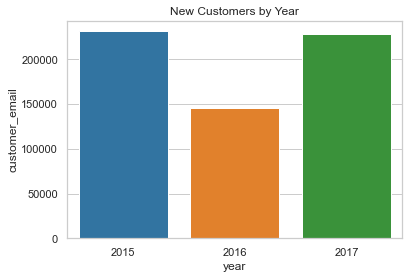

In [44]:
#plotting new customers by year
with sns.plotting_context("notebook",font_scale=1):
    sns.set_style("whitegrid")
    sns.barplot(data=new_customer, x='year', y='customer_email').set_title('New Customers by Year')
    sns.set(rc={'figure.figsize':(18,10)})

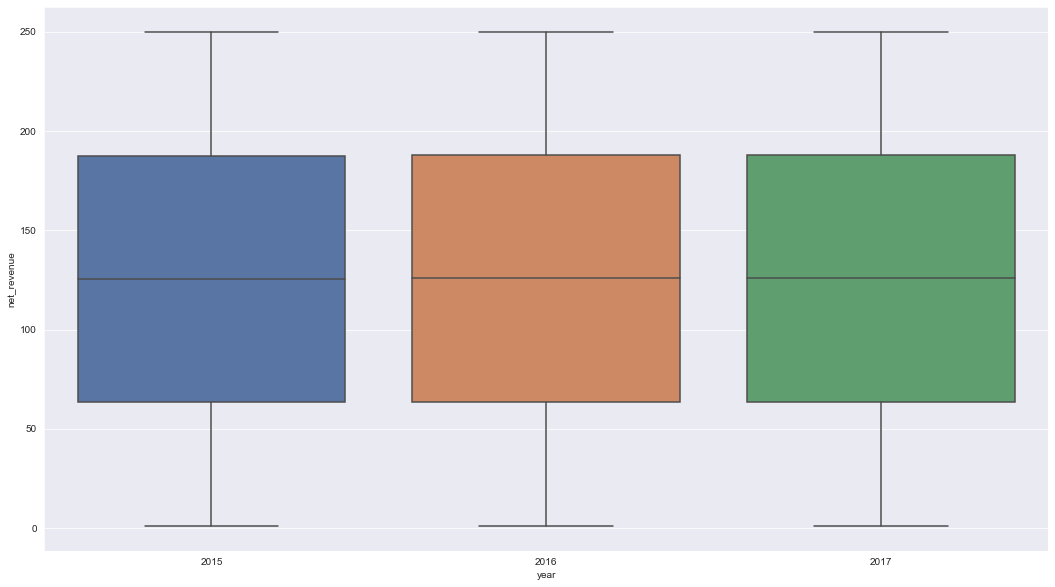

In [46]:
#revenue by year
sns.boxplot(data=df, x='year', y='net_revenue')

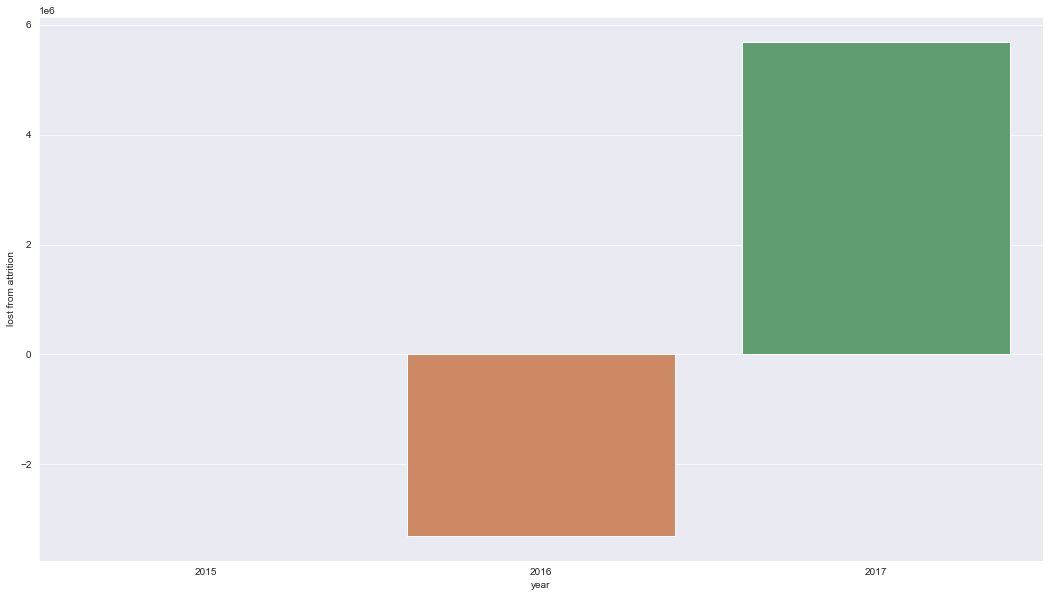

In [50]:
#revenue lost from attrition
sns.barplot(data=new_rev_2, x='year', y='lost from attrition')